In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras    
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

2025-03-23 11:59:03.706946: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-23 11:59:03.716939: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742711343.729018    1053 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742711343.732560    1053 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-23 11:59:03.744641: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

### Data Input

In [13]:
img_height,img_width=224,224
batch_size=8
directory = '/home/axernox/Project_2/Lungs_Cropped/train'
train = keras.utils.image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=8,
    image_size=(img_height,img_width),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 3805 files belonging to 2 classes.


In [14]:
directoryval = '/home/axernox/Project_2/Lungs_Cropped/val'
val = keras.utils.image_dataset_from_directory(
    directoryval,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=8,
    image_size=(img_height,img_width),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 815 files belonging to 2 classes.


In [15]:
directorytest = '/home/axernox/Project_2/Lungs_Cropped/test'
test = keras.utils.image_dataset_from_directory(
    directorytest,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=8,
    image_size=(img_height,img_width),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 804 files belonging to 2 classes.


In [5]:
class_names = train.class_names
print(class_names)

['Resistive', 'Sensitive']


In [16]:
pretrained_model= tf.keras.applications.DenseNet201(
                    include_top=False,
                    input_shape=(224,224,3),
                    pooling='avg',
                    classes=2,
                    weights="imagenet")
for layer in pretrained_model.layers:
        layer.trainable=False
for layer in pretrained_model.layers[-10:]:
    layer.trainable = True

x = pretrained_model.output
x = Dense(512, activation='relu')(x)
output = Dense(2, activation='softmax')(x)      

densnet_model = Model(inputs=pretrained_model.input, outputs=output)


In [ ]:
densnet_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_4         │ (None, 256, 256,  │          0 │ input_layer_2[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_2     │ (None, 256, 256,  │          7 │ rescaling_4[0][0] │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_5         │ (None, 256, 256,  │          0 │ normalization_2[… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 257, 257,  │          0 │ rescaling_5[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 128, 128,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 128, 128,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 128, 128,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 128, 128,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 128, 128,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 128, 128,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 128, 128,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 128, 128,  │        512 │ block1a_se_excit

 Total params: 4,706,469 (17.95 MB)

 Trainable params: 1,550,130 (5.91 MB)

 Non-trainable params: 3,156,339 (12.04 MB)

In [17]:
densnet_model.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

### Raw Images

In [8]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = densnet_model.fit(
  train,
  validation_data=val,
  epochs=20,
  batch_size=8,
  #callbacks=[early_stopping]
)

Epoch 1/20


I0000 00:00:1741979049.591121    1134 service.cc:148] XLA service 0x7faba40e51d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1741979049.594770    1134 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Ti Laptop GPU, Compute Capability 8.6
2025-03-15 00:34:10.270715: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1741979054.999952    1134 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-03-15 00:34:17.597756: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_18466', 4 bytes spill stores, 4 bytes spill loads

2025-03-15 00:34:55.263676: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusio

475/476 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5978 - loss: 0.6745

2025-03-15 00:35:20.848476: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_18466', 4 bytes spill stores, 4 bytes spill loads

2025-03-15 00:35:44.643251: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_2', 40 bytes spill stores, 40 bytes spill loads



476/476 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.5978 - loss: 0.6744

2025-03-15 00:36:06.254092: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_5431', 4 bytes spill stores, 4 bytes spill loads



476/476 ━━━━━━━━━━━━━━━━━━━━ 157s 200ms/step - accuracy: 0.5979 - loss: 0.6743 - val_accuracy: 0.6417 - val_loss: 0.5912
Epoch 2/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 27s 57ms/step - accuracy: 0.6888 - loss: 0.5893 - val_accuracy: 0.6883 - val_loss: 0.5437
Epoch 3/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 37s 76ms/step - accuracy: 0.7135 - loss: 0.5566 - val_accuracy: 0.7227 - val_loss: 0.5058
Epoch 4/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 27s 57ms/step - accuracy: 0.7232 - loss: 0.5247 - val_accuracy: 0.7472 - val_loss: 0.5072
Epoch 5/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 24s 51ms/step - accuracy: 0.7565 - loss: 0.4877 - val_accuracy: 0.7558 - val_loss: 0.4959
Epoch 6/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 34s 72ms/step - accuracy: 0.7693 - loss: 0.4584 - val_accuracy: 0.7227 - val_loss: 0.5074
Epoch 7/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 32s 66ms/step - accuracy: 0.8199 - loss: 0.4032 - val_accuracy: 0.7067 - val_loss: 0.5847
Epoch 8/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 26s 54ms/step - accuracy: 0.8176 - loss: 0.3801 - val_accur

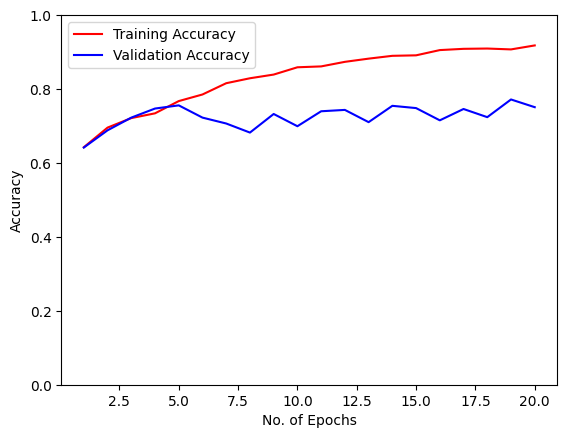

In [9]:
epochs = [i for i in range(1,21)]
plt.plot(epochs,history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs,history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.ylim((0,1))
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [10]:
pred = densnet_model.predict(test)
pred_cat = tf.argmax(pred, axis=1)
true_cat = tf.concat([y for x,y in test], axis=0)
y_true = tf.argmax(true_cat, axis=1)

100/101 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step

2025-03-15 00:50:14.280408: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_5402', 4 bytes spill stores, 4 bytes spill loads



101/101 ━━━━━━━━━━━━━━━━━━━━ 65s 406ms/step


2025-03-15 00:50:40.849345: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [11]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_true, pred_cat, target_names=class_names))

              precision    recall  f1-score   support

   Resistive       0.75      0.88      0.81       399
   Sensitive       0.86      0.71      0.78       405

    accuracy                           0.79       804
   macro avg       0.80      0.80      0.79       804
weighted avg       0.81      0.79      0.79       804



<Axes: >

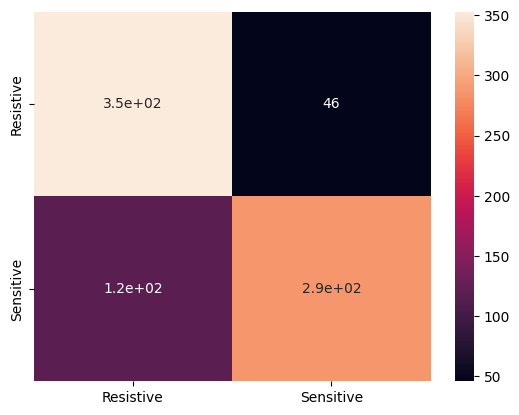

In [12]:
import seaborn as sns
cm = confusion_matrix(y_true, pred_cat,)
plt.figure()
sns.heatmap(cm, annot=True, xticklabels=class_names, yticklabels=class_names)

### With CLAHE

In [28]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = densnet_model.fit(
  train,
  validation_data=val,
  epochs=20,
  batch_size=8,
  #callbacks=[early_stopping]
)

Epoch 1/20


2025-03-14 17:56:46.297887: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_2', 40 bytes spill stores, 40 bytes spill loads



474/476 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6063 - loss: 0.6675

2025-03-14 17:57:23.926126: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_2', 40 bytes spill stores, 40 bytes spill loads



476/476 ━━━━━━━━━━━━━━━━━━━━ 97s 137ms/step - accuracy: 0.6065 - loss: 0.6674 - val_accuracy: 0.6908 - val_loss: 0.5694
Epoch 2/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 25s 53ms/step - accuracy: 0.6918 - loss: 0.5733 - val_accuracy: 0.7067 - val_loss: 0.5462
Epoch 3/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 26s 54ms/step - accuracy: 0.7436 - loss: 0.5107 - val_accuracy: 0.7509 - val_loss: 0.5096
Epoch 4/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 25s 53ms/step - accuracy: 0.7671 - loss: 0.4767 - val_accuracy: 0.7337 - val_loss: 0.5262
Epoch 5/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 27s 56ms/step - accuracy: 0.7937 - loss: 0.4428 - val_accuracy: 0.7374 - val_loss: 0.5311
Epoch 6/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 27s 57ms/step - accuracy: 0.8202 - loss: 0.3872 - val_accuracy: 0.7362 - val_loss: 0.6213
Epoch 7/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 29s 60ms/step - accuracy: 0.8456 - loss: 0.3587 - val_accuracy: 0.7055 - val_loss: 0.6317
Epoch 8/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 37s 78ms/step - accuracy: 0.8502 - loss: 0.3184 - val_accura

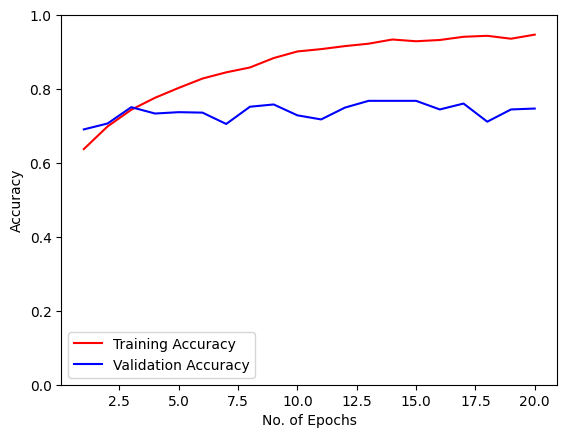

In [29]:
epochs = [i for i in range(1,21)]
plt.plot(epochs,history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs,history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.ylim((0,1))
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [30]:
pred = densnet_model.predict(test)
pred_cat = tf.argmax(pred, axis=1)
true_cat = tf.concat([y for x,y in test], axis=0)
y_true = tf.argmax(true_cat, axis=1)

101/101 ━━━━━━━━━━━━━━━━━━━━ 37s 236ms/step


In [31]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_true, pred_cat, target_names=class_names))

              precision    recall  f1-score   support

   Resistive       0.86      0.68      0.76       399
   Sensitive       0.74      0.89      0.81       405

    accuracy                           0.79       804
   macro avg       0.80      0.79      0.78       804
weighted avg       0.80      0.79      0.78       804



<Axes: >

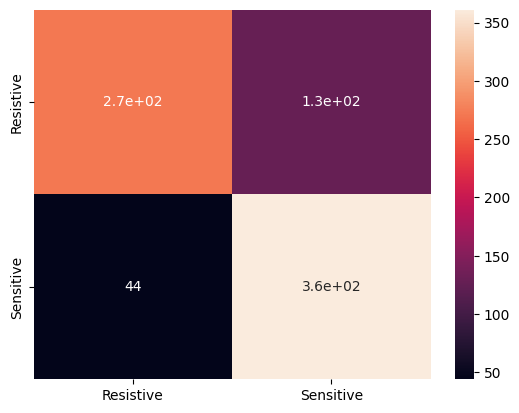

In [32]:
import seaborn as sns
cm = confusion_matrix(y_true, pred_cat,)
plt.figure()
sns.heatmap(cm, annot=True, xticklabels=class_names, yticklabels=class_names)

### With Gabor

In [18]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = densnet_model.fit(
  train,
  validation_data=val,
  epochs=20,
  batch_size=8,
  #callbacks=[early_stopping]
)

Epoch 1/20


2025-03-14 17:07:27.977560: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_2', 40 bytes spill stores, 40 bytes spill loads



475/476 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.6161 - loss: 0.6803

2025-03-14 17:08:05.928202: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_2', 40 bytes spill stores, 40 bytes spill loads



476/476 ━━━━━━━━━━━━━━━━━━━━ 94s 135ms/step - accuracy: 0.6163 - loss: 0.6802 - val_accuracy: 0.6577 - val_loss: 0.6326
Epoch 2/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 25s 53ms/step - accuracy: 0.7070 - loss: 0.5769 - val_accuracy: 0.7215 - val_loss: 0.5429
Epoch 3/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 27s 56ms/step - accuracy: 0.7456 - loss: 0.5114 - val_accuracy: 0.7436 - val_loss: 0.5331
Epoch 4/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 27s 57ms/step - accuracy: 0.7831 - loss: 0.4590 - val_accuracy: 0.7571 - val_loss: 0.5114
Epoch 5/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 27s 57ms/step - accuracy: 0.8069 - loss: 0.4083 - val_accuracy: 0.7534 - val_loss: 0.5283
Epoch 6/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 28s 58ms/step - accuracy: 0.8470 - loss: 0.3565 - val_accuracy: 0.7485 - val_loss: 0.6152
Epoch 7/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 27s 57ms/step - accuracy: 0.8474 - loss: 0.3361 - val_accuracy: 0.7706 - val_loss: 0.5502
Epoch 8/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 28s 59ms/step - accuracy: 0.8858 - loss: 0.2831 - val_accura

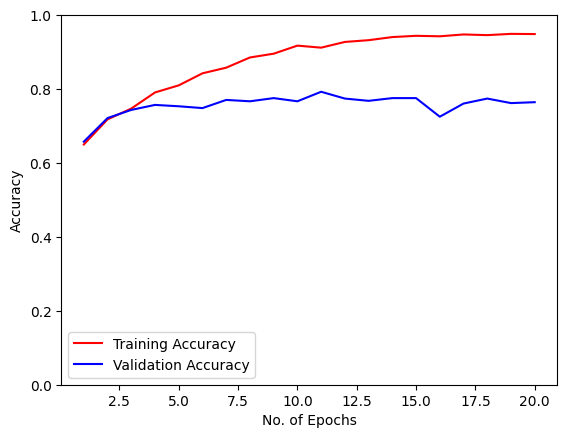

In [19]:
epochs = [i for i in range(1,21)]
plt.plot(epochs,history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs,history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.ylim((0,1))
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [20]:
pred = densnet_model.predict(test)
pred_cat = tf.argmax(pred, axis=1)
true_cat = tf.concat([y for x,y in test], axis=0)
y_true = tf.argmax(true_cat, axis=1)

101/101 ━━━━━━━━━━━━━━━━━━━━ 37s 177ms/step


2025-03-14 17:21:16.606929: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [21]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_true, pred_cat, target_names=class_names))

              precision    recall  f1-score   support

   Resistive       0.78      0.85      0.82       399
   Sensitive       0.84      0.77      0.80       405

    accuracy                           0.81       804
   macro avg       0.81      0.81      0.81       804
weighted avg       0.81      0.81      0.81       804



<Axes: >

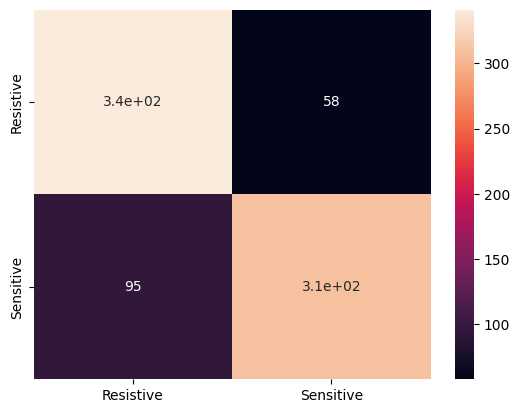

In [22]:
import seaborn as sns
cm = confusion_matrix(y_true, pred_cat,)
plt.figure()
sns.heatmap(cm, annot=True, xticklabels=class_names, yticklabels=class_names)

### With CANNY

In [8]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = densnet_model.fit(
  train,
  validation_data=val,
  epochs=20,
  batch_size=8,
  #callbacks=[early_stopping]
)

Epoch 1/20


I0000 00:00:1741951466.267235    1702 service.cc:148] XLA service 0x7f4f30002120 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1741951466.277320    1702 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Ti Laptop GPU, Compute Capability 8.6
2025-03-14 16:54:26.977702: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1741951469.820391    1702 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-03-14 16:54:31.138780: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_18466', 4 bytes spill stores, 4 bytes spill loads

2025-03-14 16:54:56.426888: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusio

475/476 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5522 - loss: 0.7238

2025-03-14 16:55:19.681008: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_18466', 4 bytes spill stores, 4 bytes spill loads

2025-03-14 16:55:44.225004: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_2', 40 bytes spill stores, 40 bytes spill loads



476/476 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.5523 - loss: 0.7238

2025-03-14 16:56:05.743968: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_5431', 4 bytes spill stores, 4 bytes spill loads



476/476 ━━━━━━━━━━━━━━━━━━━━ 133s 191ms/step - accuracy: 0.5524 - loss: 0.7237 - val_accuracy: 0.5620 - val_loss: 0.7534
Epoch 2/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 23s 49ms/step - accuracy: 0.6091 - loss: 0.6567 - val_accuracy: 0.6135 - val_loss: 0.7020
Epoch 3/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 24s 49ms/step - accuracy: 0.6521 - loss: 0.6213 - val_accuracy: 0.6196 - val_loss: 0.7105
Epoch 4/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 24s 51ms/step - accuracy: 0.6794 - loss: 0.5884 - val_accuracy: 0.6135 - val_loss: 0.6953
Epoch 5/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 23s 49ms/step - accuracy: 0.6877 - loss: 0.6022 - val_accuracy: 0.6294 - val_loss: 0.6984
Epoch 6/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 24s 50ms/step - accuracy: 0.7052 - loss: 0.5618 - val_accuracy: 0.5791 - val_loss: 0.7781
Epoch 7/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 24s 50ms/step - accuracy: 0.7070 - loss: 0.5610 - val_accuracy: 0.6417 - val_loss: 0.6672
Epoch 8/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 24s 50ms/step - accuracy: 0.7193 - loss: 0.5333 - val_accur

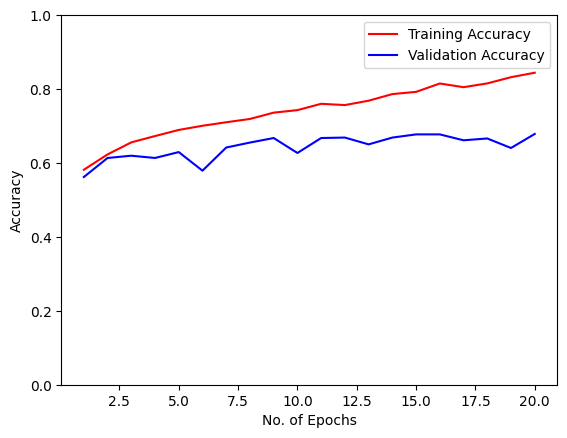

In [9]:
epochs = [i for i in range(1,21)]
plt.plot(epochs,history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs,history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.ylim((0,1))
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [10]:
pred = densnet_model.predict(test)
pred_cat = tf.argmax(pred, axis=1)
true_cat = tf.concat([y for x,y in test], axis=0)
y_true = tf.argmax(true_cat, axis=1)

 99/101 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step

2025-03-14 17:06:00.268264: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_5402', 4 bytes spill stores, 4 bytes spill loads



101/101 ━━━━━━━━━━━━━━━━━━━━ 56s 369ms/step


2025-03-14 17:06:24.307460: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [11]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_true, pred_cat, target_names=class_names))

              precision    recall  f1-score   support

   Resistive       0.68      0.83      0.75       399
   Sensitive       0.79      0.62      0.70       405

    accuracy                           0.73       804
   macro avg       0.74      0.73      0.72       804
weighted avg       0.74      0.73      0.72       804



<Axes: >

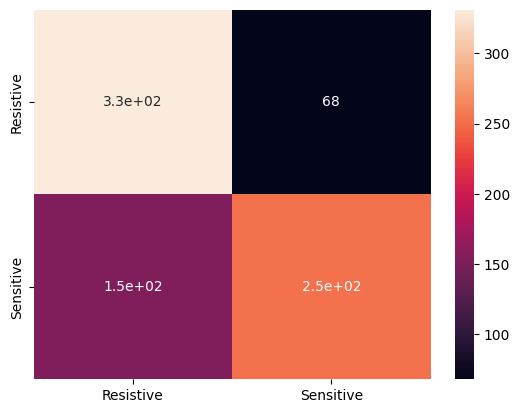

In [12]:
import seaborn as sns
cm = confusion_matrix(y_true, pred_cat,)
plt.figure()
sns.heatmap(cm, annot=True, xticklabels=class_names, yticklabels=class_names)

### Lungs Cropped On CLAHE

In [18]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = densnet_model.fit(
  train,
  validation_data=val,
  epochs=20,
  batch_size=8,
  #callbacks=[early_stopping]
)

Epoch 1/20


2025-03-23 12:17:04.810595: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_2', 40 bytes spill stores, 40 bytes spill loads



475/476 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5852 - loss: 0.6709

2025-03-23 12:17:33.463538: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_2', 40 bytes spill stores, 40 bytes spill loads



476/476 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.5852 - loss: 0.6709

2025-03-23 12:17:57.176564: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_5430', 4 bytes spill stores, 4 bytes spill loads



476/476 ━━━━━━━━━━━━━━━━━━━━ 98s 159ms/step - accuracy: 0.5852 - loss: 0.6708 - val_accuracy: 0.6613 - val_loss: 0.6213
Epoch 2/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - accuracy: 0.6550 - loss: 0.6196 - val_accuracy: 0.6761 - val_loss: 0.5989
Epoch 3/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7097 - loss: 0.5732 - val_accuracy: 0.6822 - val_loss: 0.5898
Epoch 4/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.7476 - loss: 0.5025 - val_accuracy: 0.5975 - val_loss: 0.8956
Epoch 5/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 23s 47ms/step - accuracy: 0.7684 - loss: 0.4736 - val_accuracy: 0.6933 - val_loss: 0.5760
Epoch 6/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.8234 - loss: 0.3810 - val_accuracy: 0.6945 - val_loss: 0.6011
Epoch 7/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - accuracy: 0.8639 - loss: 0.3233 - val_accuracy: 0.7031 - val_loss: 0.6314
Epoch 8/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.8813 - loss: 0.2848 - val_accura

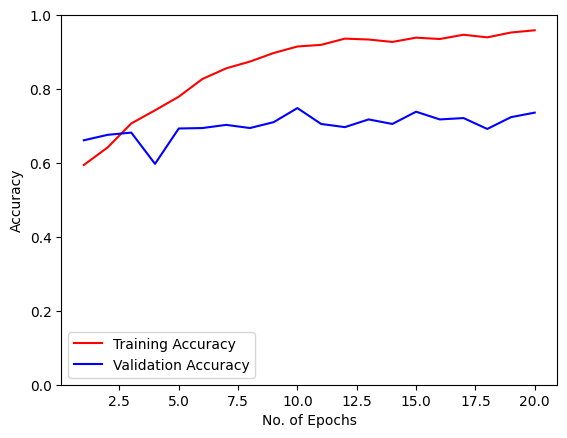

In [19]:
epochs = [i for i in range(1,21)]
plt.plot(epochs,history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs,history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.ylim((0,1))
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [20]:
pred = densnet_model.predict(test)
pred_cat = tf.argmax(pred, axis=1)
true_cat = tf.concat([y for x,y in test], axis=0)
y_true = tf.argmax(true_cat, axis=1)

100/101 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step

2025-03-23 12:25:37.327948: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_5402', 4 bytes spill stores, 4 bytes spill loads



101/101 ━━━━━━━━━━━━━━━━━━━━ 43s 310ms/step


2025-03-23 12:25:56.355420: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [21]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_true, pred_cat, target_names=class_names))

              precision    recall  f1-score   support

   Resistive       0.75      0.76      0.75       399
   Sensitive       0.76      0.74      0.75       405

    accuracy                           0.75       804
   macro avg       0.75      0.75      0.75       804
weighted avg       0.75      0.75      0.75       804



<Axes: >

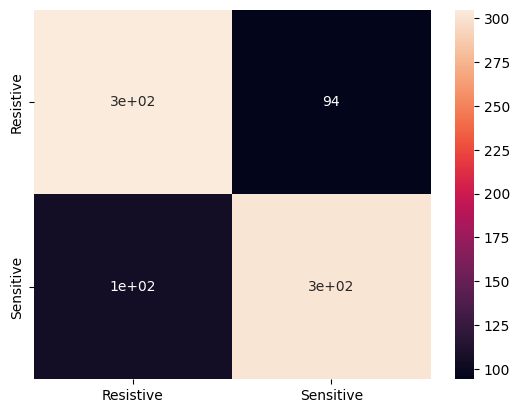

In [22]:
import seaborn as sns
cm = confusion_matrix(y_true, pred_cat,)
plt.figure()
sns.heatmap(cm, annot=True, xticklabels=class_names, yticklabels=class_names)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = densnet_model.fit(
  train,
  validation_data=val,
  epochs=20,
  batch_size=8,
  #callbacks=[early_stopping]
)

Epoch 1/20


2025-03-23 12:17:04.810595: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_2', 40 bytes spill stores, 40 bytes spill loads



475/476 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5852 - loss: 0.6709

2025-03-23 12:17:33.463538: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_2', 40 bytes spill stores, 40 bytes spill loads



476/476 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.5852 - loss: 0.6709

2025-03-23 12:17:57.176564: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_5430', 4 bytes spill stores, 4 bytes spill loads



476/476 ━━━━━━━━━━━━━━━━━━━━ 98s 159ms/step - accuracy: 0.5852 - loss: 0.6708 - val_accuracy: 0.6613 - val_loss: 0.6213
Epoch 2/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - accuracy: 0.6550 - loss: 0.6196 - val_accuracy: 0.6761 - val_loss: 0.5989
Epoch 3/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7097 - loss: 0.5732 - val_accuracy: 0.6822 - val_loss: 0.5898
Epoch 4/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.7476 - loss: 0.5025 - val_accuracy: 0.5975 - val_loss: 0.8956
Epoch 5/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 23s 47ms/step - accuracy: 0.7684 - loss: 0.4736 - val_accuracy: 0.6933 - val_loss: 0.5760
Epoch 6/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.8234 - loss: 0.3810 - val_accuracy: 0.6945 - val_loss: 0.6011
Epoch 7/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - accuracy: 0.8639 - loss: 0.3233 - val_accuracy: 0.7031 - val_loss: 0.6314
Epoch 8/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.8813 - loss: 0.2848 - val_accura

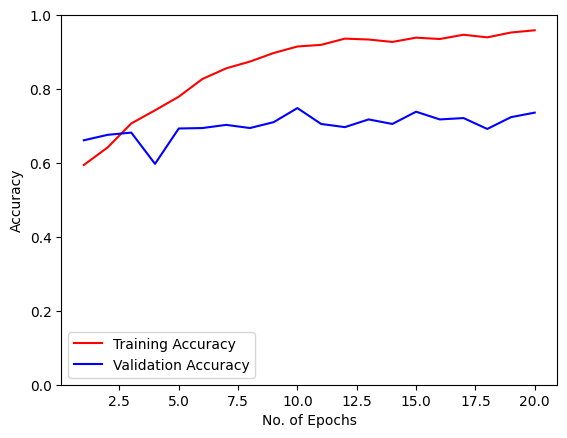

In [ ]:
epochs = [i for i in range(1,21)]
plt.plot(epochs,history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs,history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.ylim((0,1))
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
pred = densnet_model.predict(test)
pred_cat = tf.argmax(pred, axis=1)
true_cat = tf.concat([y for x,y in test], axis=0)
y_true = tf.argmax(true_cat, axis=1)

100/101 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step

2025-03-23 12:25:37.327948: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_5402', 4 bytes spill stores, 4 bytes spill loads



101/101 ━━━━━━━━━━━━━━━━━━━━ 43s 310ms/step


2025-03-23 12:25:56.355420: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_true, pred_cat, target_names=class_names))

              precision    recall  f1-score   support

   Resistive       0.75      0.76      0.75       399
   Sensitive       0.76      0.74      0.75       405

    accuracy                           0.75       804
   macro avg       0.75      0.75      0.75       804
weighted avg       0.75      0.75      0.75       804



<Axes: >

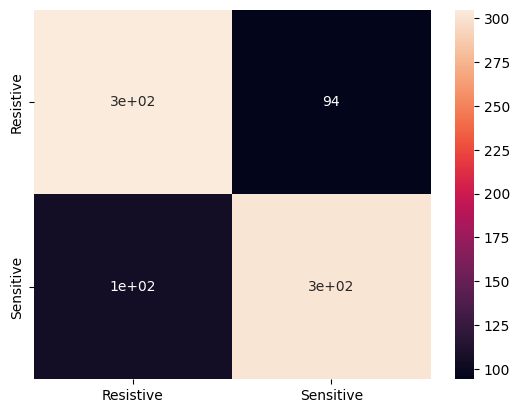

In [ ]:
import seaborn as sns
cm = confusion_matrix(y_true, pred_cat,)
plt.figure()
sns.heatmap(cm, annot=True, xticklabels=class_names, yticklabels=class_names)